In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0}

In [4]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [5]:
cat.load(2.0/3.0)

In [6]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [7]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [8]:
cat.calc_number_density()

0.000935125

In [9]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [10]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [11]:
wp_vals.shape

(10, 14)

In [12]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

In [ ]:
np.savetxt('/u/ki/swmclau2/des/PearceMCMC/wp.npy')

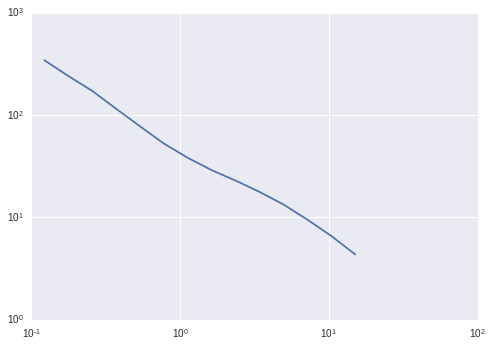

In [13]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [22]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

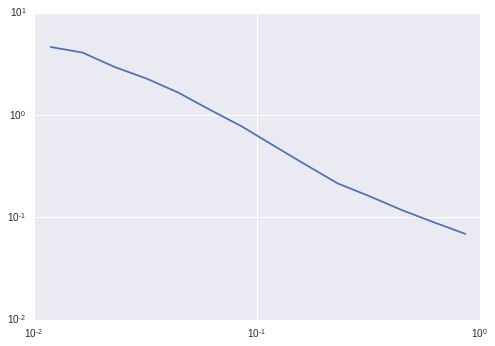

In [23]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [24]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [25]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [26]:
errs = np.sqrt(np.diag(cov))
print errs

[  2.43827804e+02   1.92467992e+01   6.98501487e+00   2.11750739e+00
   9.56364588e-01   4.91020441e-01   1.98185127e-01   7.14543469e-02
   2.25226719e-02   1.20559935e-02   7.68250518e-03]


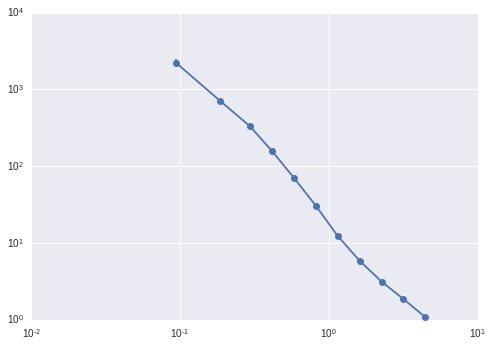

In [27]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [28]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [29]:
errs = np.sqrt(np.diag(cov))
print errs

[  1.25291212e+01   3.23779585e+00   2.16878752e+00   1.26201495e+00
   7.66846687e-01   4.44001772e-01   2.02594320e-01   6.97349694e-02
   2.18578370e-02   1.15854203e-02   8.15633965e-03]


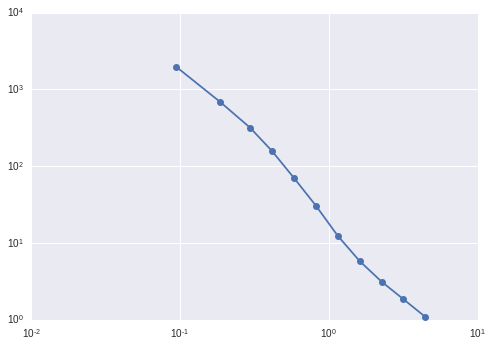

In [30]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()